# Analysis of Produce Sales at a Grocery Store

### Apratim Biswas

In [2460]:
import sys
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
import joblib
from joblib import dump

In [2461]:
df_data=pd.read_csv("../Dunnhumby-The_Complete_Journey-Data Prep/data/all_tables_combined.csv")   #read data from all_tables_combined.csv

In [2462]:
df_data.head(3)

,household_key,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2305,873203,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
1,2305,873203,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
2,2305,873203,1,1.89,414,0.00,1111,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ


In [2463]:
#df_s_parent=df_data[df_data['HH_COMP_DESC']=="1 Adult Kids"]
#df_s_parent=df_data

In [2464]:
#determining length of campaign and dropping unnecessary columns.

df_data['NUM_DAYS']=df_data['END_DAY'] - df_data['START_DAY'] + 1
df_data.drop(['START_DAY','END_DAY','COUPON_UPC','household_key','PRODUCT_ID'], axis=1, inplace=True)

In [2465]:
df_data.head(2)

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
0,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
1,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48


In [2466]:
#sns.pairplot(df_data)

In [2467]:
df_data

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
0,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
1,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
2,1,1.89,414,0.00,1111,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
3,1,1.67,414,-0.22,1341,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
4,1,1.67,414,-0.22,1243,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112017,1,2.50,304,-0.19,1456,0.0,0.0,TypeA,18,603,...,1 Adult Kids,4,3+,135,GROCERY,National,FRZN POTATOES,FRZN FRENCH FRIES,26 OZ,56
112018,2,3.70,402,0.00,1334,0.0,0.0,TypeA,8,438,...,2 Adults No Kids,2,None/Unknown,1251,GROCERY,National,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,18.8 OZ,49
112019,1,5.49,402,0.00,1334,0.0,0.0,TypeA,18,608,...,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,,56
112020,1,5.59,402,0.00,1334,0.0,0.0,TypeA,18,608,...,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,,56


Let's compute discount percent and then drop all rows with NA.

In [2468]:
df_data['DISCOUNT_PCT']=(df_data['RETAIL_DISC']+df_data['COUPON_DISC']+df_data['COUPON_MATCH_DISC'])*100/(df_data['RETAIL_DISC']+df_data['COUPON_DISC']+df_data['COUPON_MATCH_DISC']+df_data['SALES_VALUE'])
df_data['DISCOUNT_PCT']=~df_data['DISCOUNT_PCT'].isna()
df_data['DISCOUNT_PCT'].isna().sum()

0

In [2469]:
df_data['description'].value_counts()   #number of transactions belonging to campaign within each type of campaign.

TypeA    105537
TypeB      5972
TypeC       513
Name: description, dtype: int64

In [2470]:
df_data.columns

Index(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'CAMPAIGN', 'DAY',
       'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT', 'NUM_DAYS',
       'DISCOUNT_PCT'],
      dtype='object')

Let's take a look at the most frequent commodities in the dataset.

In [2471]:
df_data['COMMODITY_DESC'].value_counts()

FLUID MILK PRODUCTS          6210
BEEF                         5660
FRZN MEAT/MEAT DINNERS       5620
YOGURT                       5403
TROPICAL FRUIT               3832
                             ... 
PWDR/CRYSTL DRNK MX             1
GIFT & FRUIT BASKETS            1
RW FRESH PROCESSED MEAT         1
WATCHES/CALCULATORS/LOBBY       1
SEAFOOD - SHELF STABLE          1
Name: COMMODITY_DESC, Length: 215, dtype: int64

In [2472]:
df_data['COMMODITY_DESC'].unique()

array(['CHEESE', 'GRAPES', 'SALAD MIX', 'MELONS', 'TOMATOES',
       'FLUID MILK PRODUCTS', 'VEGETABLES - ALL OTHERS',
       'MILK BY-PRODUCTS', 'COLD CEREAL', 'SEAFOOD-FRESH', 'EGGS',
       'TROPICAL FRUIT', 'FLORAL-FRESH CUT', 'FROZEN PIZZA',
       'PASTA SAUCE', 'FRZN MEAT/MEAT DINNERS', 'FROZEN PIE/DESSERTS',
       'FROZEN BREAD/DOUGH', 'SALAD BAR', 'CHICKEN', 'MARGARINES',
       'BACON', 'BEEF', 'PORK', 'REFRGRATD JUICES/DRNKS',
       'FRUIT - SHELF STABLE', 'REFRGRATD DOUGH PRODUCTS', 'LUNCHMEAT',
       'MEAT - MISC', 'HOT DOGS', 'SWEET GOODS & SNACKS', 'BERRIES',
       'YOGURT', 'ICE CREAM/MILK/SHERBTS', 'TURKEY',
       'BROCCOLI/CAULIFLOWER', 'MOLASSES/SYRUP/PANCAKE MIXS', 'CITRUS',
       'APPLES', 'VEGETABLES SALAD', 'PEPPERS-ALL', 'SEAFOOD - FROZEN',
       'VEAL', 'LAXATIVES', 'ORAL HYGIENE PRODUCTS', 'COLD AND FLU',
       'MAKEUP AND TREATMENT', 'ANALGESICS', 'SOFT DRINKS', 'CARROTS',
       'PICKLE/RELISH/PKLD VEG', 'DINNER SAUSAGE',
       'FRZN NOVELTIES/WTR I

Here's the list of commodities to include in produce:

['GRAPES', 'SALAD MIX', 'MELONS', 'TOMATOES', 'VEGETABLES - ALL OTHERS', 'TROPICAL FRUIT','SALAD BAR', 'REFRGRATD JUICES/DRNKS', 'FRUIT - SHELF STABLE','BERRIES','BROCCOLI/CAULIFLOWER','CITRUS','APPLES', 'VEGETABLES SALAD', 'PEPPERS-ALL', 'CARROTS', 'POTATOES', 'ONIONS','FRZN VEGETABLE/VEG DSH', 'VALUE ADDED FRUIT', 'JUICE','PEARS','ORGANICS FRUIT & VEGETABLES','CORN','MUSHROOMS', 'HERBS', 'CANNED JUICES', 'SQUASH', 'VEGETABLES - SHELF STABLE', 'VALUE ADDED VEGETABLES', 'STONE FRUIT', 'FRZN JCE CONC/DRNKS', 'SALADS/DIPS','GIFT & FRUIT BASKETS']

In [2473]:
produce_list=['GRAPES', 'SALAD MIX', 'MELONS', 'TOMATOES', 'VEGETABLES - ALL OTHERS', 'TROPICAL FRUIT','SALAD BAR', 'REFRGRATD JUICES/DRNKS', 'FRUIT - SHELF STABLE','BERRIES','BROCCOLI/CAULIFLOWER','CITRUS','APPLES', 'VEGETABLES SALAD', 'PEPPERS-ALL', 'CARROTS', 'POTATOES', 'ONIONS','FRZN VEGETABLE/VEG DSH', 'VALUE ADDED FRUIT', 'JUICE','PEARS','ORGANICS FRUIT & VEGETABLES','CORN','MUSHROOMS', 'HERBS', 'CANNED JUICES', 'SQUASH', 'VEGETABLES - SHELF STABLE', 'VALUE ADDED VEGETABLES', 'STONE FRUIT', 'FRZN JCE CONC/DRNKS', 'SALADS/DIPS','GIFT & FRUIT BASKETS']

In [2474]:
df_data=df_data[df_data['COMMODITY_DESC'].isin(produce_list)]

Let's take a look at the most frequent sub-commodities in the dataset.

In [2475]:
df_sub_commodity=pd.DataFrame(df_data['SUB_COMMODITY_DESC'].value_counts())
df_sub_commodity

,SUB_COMMODITY_DESC
BANANAS,3274
DAIRY CASE 100% PURE JUICE - O,2063
FRZN BAGGED VEGETABLES - PLAIN,1284
STRAWBERRIES,1031
CARROTS MINI PEELED,871
...,...
VEG JUICE (EXCEPT TOMATO) (50%,1
FRUIT PARTY TRAY,1
PROCESSED SALAD,1
APPLE JUICE & CIDER (OVER 50%,1


In [2476]:
df_sub_commodity[df_sub_commodity['SUB_COMMODITY_DESC']>=50]['SUB_COMMODITY_DESC'].sum()/df_sub_commodity['SUB_COMMODITY_DESC'].sum()

0.9563742825671053

Thus sub-commodities with >=50 instances make up more than 95% of records.

In [2477]:
sub_commodity_selection=df_sub_commodity[df_sub_commodity['SUB_COMMODITY_DESC']>=50].index

In [2478]:
df_data=df_data[df_data['SUB_COMMODITY_DESC'].isin(sub_commodity_selection)]
df_data.head(2)

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS,DISCOUNT_PCT
7,1,1.45,414,0.0,1300,0.0,0.0,TypeA,18,599,...,1,None/Unknown,2,PRODUCE,National,GRAPES,GRAPES RED,18 LB,56,True
8,1,1.49,414,-0.5,1220,0.0,0.0,TypeA,18,599,...,1,None/Unknown,2,PRODUCE,National,GRAPES,GRAPES RED,18 LB,56,True


In [2479]:
df_data.columns.values

array(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'CAMPAIGN',
       'DAY', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'MANUFACTURER', 'DEPARTMENT', 'BRAND',
       'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'NUM_DAYS', 'DISCOUNT_PCT'], dtype=object)

In [2480]:
df_data.drop(['TRANS_TIME','AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC','HH_COMP_DESC', 'KID_CATEGORY_DESC', 'DEPARTMENT', 'COMMODITY_DESC','DISCOUNT_PCT'], axis=1, inplace=True)

In [2481]:
df_data

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,HOUSEHOLD_SIZE_DESC,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
7,1,1.45,414,0.00,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
8,1,1.49,414,-0.50,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
9,1,4.28,414,0.00,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
10,1,2.08,414,-1.47,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
11,1,1.84,414,-1.27,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111964,1,1.67,420,-0.12,0.0,0.0,TypeA,8,424,4,282,National,FRZN BOXED VEGETABLES- VALUE A,10OZ,49
111971,1,1.12,389,0.00,0.0,0.0,TypeA,18,606,3,2,National,POTATOES RED (BULK&BAG),,56
111972,0,0.00,389,0.00,0.0,0.0,TypeA,18,606,3,2,National,PEACHES YELLOW FLESH,64 CT,56
111992,1,3.67,404,0.00,0.0,0.0,TypeA,18,598,2,2,National,APPLES OTHER (BULK&BAG),,56


In [2482]:
df_sizes=pd.DataFrame(df_data['CURR_SIZE_OF_PRODUCT'].value_counts())
df_sizes.head(60)

,CURR_SIZE_OF_PRODUCT
,7098
40 LB,4231
16 OZ,2152
1 LB,1626
18 LB,1460
64 OZ,1288
10 OZ,1196
12 OZ,846
3 LB,725
24CT,718


In [2483]:
df_sizes[df_sizes['CURR_SIZE_OF_PRODUCT']>50].sum()/df_sizes['CURR_SIZE_OF_PRODUCT'].sum()

CURR_SIZE_OF_PRODUCT    0.971479
dtype: float64

In [2484]:
list_of_sizes = df_sizes[df_sizes['CURR_SIZE_OF_PRODUCT']>50].index

In [2485]:
df_data=df_data[df_data['CURR_SIZE_OF_PRODUCT'].isin(list_of_sizes)]
df_data

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,HOUSEHOLD_SIZE_DESC,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
7,1,1.45,414,0.00,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
8,1,1.49,414,-0.50,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
9,1,4.28,414,0.00,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
10,1,2.08,414,-1.47,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
11,1,1.84,414,-1.27,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111956,1,6.99,34280,0.00,0.0,0.0,TypeA,18,626,2,673,National,CLEMENTINES,5 LB,56
111964,1,1.67,420,-0.12,0.0,0.0,TypeA,8,424,4,282,National,FRZN BOXED VEGETABLES- VALUE A,10OZ,49
111971,1,1.12,389,0.00,0.0,0.0,TypeA,18,606,3,2,National,POTATOES RED (BULK&BAG),,56
111992,1,3.67,404,0.00,0.0,0.0,TypeA,18,598,2,2,National,APPLES OTHER (BULK&BAG),,56


In [2486]:
df_store_list=pd.DataFrame(df_data['STORE_ID'].value_counts())
store_list=df_store_list[df_store_list['STORE_ID']>5].index

In [2487]:
df_data=df_data[df_data['STORE_ID'].isin(store_list)]
df_data

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,HOUSEHOLD_SIZE_DESC,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
7,1,1.45,414,0.00,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
8,1,1.49,414,-0.50,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
9,1,4.28,414,0.00,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
10,1,2.08,414,-1.47,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
11,1,1.84,414,-1.27,0.0,0.0,TypeA,18,599,1,2,National,GRAPES RED,18 LB,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111956,1,6.99,34280,0.00,0.0,0.0,TypeA,18,626,2,673,National,CLEMENTINES,5 LB,56
111964,1,1.67,420,-0.12,0.0,0.0,TypeA,8,424,4,282,National,FRZN BOXED VEGETABLES- VALUE A,10OZ,49
111971,1,1.12,389,0.00,0.0,0.0,TypeA,18,606,3,2,National,POTATOES RED (BULK&BAG),,56
111992,1,3.67,404,0.00,0.0,0.0,TypeA,18,598,2,2,National,APPLES OTHER (BULK&BAG),,56


In [2488]:
df_data['SUB_COMMODITY_DESC'].value_counts()

BANANAS                           3268
DAIRY CASE 100% PURE JUICE - O    1950
FRZN BAGGED VEGETABLES - PLAIN    1248
STRAWBERRIES                      1031
CARROTS MINI PEELED                868
                                  ... 
POTATOES GOLD (BULK&BAG)            56
TOMATOES VINE RIPE PKG              53
TANGERINES & TANGELOS               48
ORGANIC VEGETABLES ALL OTHERS       35
FRZN CONC UNDER 50% JUICE           25
Name: SUB_COMMODITY_DESC, Length: 105, dtype: int64

Let's build the model for strawberries: a season fruit with a short shelf-life.

In [2489]:
df_data=df_data[df_data['SUB_COMMODITY_DESC']=='STRAWBERRIES']

In [2490]:
df_data['CURR_SIZE_OF_PRODUCT'].unique()

array(['16 OZ', '4 LB', '1 LB'], dtype=object)

# The section below is from the notebook analyzing liquid milk products. Needs to be updated with data relevant to produce.

In [2491]:
def label_to_weight(label):
    weight=int()
    if label=='16 OZ':
        weight=16
    elif label=='1 LB':
        weight=16
    elif label=='4 LB':
        weight=64
        
    return weight

vect_label_to_weight=np.vectorize(label_to_weight)

In [2492]:
df_data['WEIGHT']=vect_label_to_weight(df_data['CURR_SIZE_OF_PRODUCT'])
df_data=df_data[df_data.notna()]
df_data.head()

<ipython-input-2492-19c21c80b14b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['WEIGHT']=vect_label_to_weight(df_data['CURR_SIZE_OF_PRODUCT'])


,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,HOUSEHOLD_SIZE_DESC,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS,WEIGHT
502,4,6.0,306,-5.96,0.0,0.0,TypeA,13,507,3,673,National,STRAWBERRIES,16 OZ,48,16
891,2,3.0,372,-2.98,0.0,0.0,TypeA,18,642,5+,1646,National,STRAWBERRIES,16 OZ,56,16
892,1,2.5,372,0.00,0.0,0.0,TypeA,18,642,5+,1646,National,STRAWBERRIES,16 OZ,56,16
2061,1,1.5,318,-1.49,0.0,0.0,TypeA,18,625,4,1646,National,STRAWBERRIES,16 OZ,56,16
2062,1,1.5,318,-1.49,0.0,0.0,TypeA,18,625,4,1646,National,STRAWBERRIES,16 OZ,56,16


In [2493]:
df_data['SALES_VALUE'].describe()

count    1031.000000
mean        3.211620
std         1.481909
min         0.000000
25%         2.500000
50%         2.990000
75%         3.490000
max        10.470000
Name: SALES_VALUE, dtype: float64

In [2494]:
df_data.groupby('NUM_DAYS').count()

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,HOUSEHOLD_SIZE_DESC,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,WEIGHT
NUM_DAYS,,,,,,,,,,,,,,,
48,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
56,838,838,838,838,838,838,838,838,838,838,838,838,838,838,838


In [2495]:
df_data=df_data[(df_data['SALES_VALUE']>0)]

In [2496]:
sales=df_data['SALES_VALUE']

In [2497]:
df_data_features=df_data.drop('SALES_VALUE', axis=1)

In [2498]:
dummy=pd.get_dummies(df_data_features['BRAND'])
#dummy_milk_type=pd.get_dummies(df_data_features['SUB_COMMODITY_DESC'],drop_first=True)
#dummy_hh_size_desc=pd.get_dummies(df_s_parent_features['HOUSEHOLD_SIZE_DESC'],drop_first=True)
dummy_manufacturer=pd.get_dummies(df_data_features['MANUFACTURER'],drop_first=True)
df_data_features=pd.concat([df_data_features,dummy], axis=1)
#df_data_features=pd.concat([df_data_features,dummy_milk_type], axis=1)
#df_s_parent_features=pd.concat([df_s_parent_features,dummy_hh_size_desc], axis=1)
df_data_features=pd.concat([df_data_features,dummy_manufacturer], axis=1)
dummy_store_id=pd.get_dummies(df_data_features['STORE_ID'],drop_first=True)
df_data_features=pd.concat([df_data_features,dummy_store_id], axis=1)
df_data_features.columns

Index([            'QUANTITY',             'STORE_ID',          'RETAIL_DISC',
                'COUPON_DISC',    'COUPON_MATCH_DISC',          'description',
                   'CAMPAIGN',                  'DAY',  'HOUSEHOLD_SIZE_DESC',
               'MANUFACTURER',                'BRAND',   'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT',             'NUM_DAYS',               'WEIGHT',
                   'National',                   1646,                   5343,
                         5545,                   5937,                    289,
                          292,                    293,                    296,
                          297,                    299,                    306,
                          310,                    311,                    316,
                          317,                    318,                    319,
                          320,                    321,                    324,
                          327,                    33

In [2499]:
dummy

,National
502,1
891,1
892,1
2061,1
2062,1
...,...
110735,1
110865,1
110866,1
110873,1


In [2500]:
#df_data_features.drop(['STORE_ID','QUANTITY','BRAND','description','MANUFACTURER','CURR_SIZE_OF_PRODUCT','SUB_COMMODITY_DESC', 'CAMPAIGN', 'NUM_DAYS'], axis=1, inplace=True)

In [2501]:
df_data_features.drop(['STORE_ID','BRAND','description','MANUFACTURER','CURR_SIZE_OF_PRODUCT','SUB_COMMODITY_DESC', 'CAMPAIGN', 'NUM_DAYS'], axis=1, inplace=True)

We want to include variables that are not strongly correlated. Seaborn's heatmap method is perfect for visualizing the inter-relationships between variables.

<AxesSubplot:>

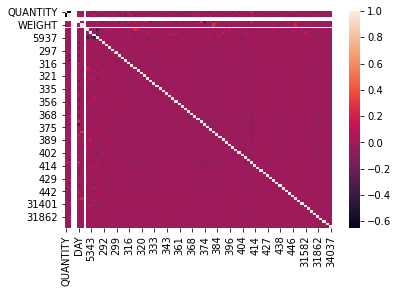

In [2502]:
sns.heatmap(df_data_features.corr())

In [2503]:
df_data_features.columns.values

array(['QUANTITY', 'RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC',
       'DAY', 'HOUSEHOLD_SIZE_DESC', 'WEIGHT', 'National', 1646, 5343,
       5545, 5937, 289, 292, 293, 296, 297, 299, 306, 310, 311, 316, 317,
       318, 319, 320, 321, 324, 327, 333, 334, 335, 338, 343, 346, 354,
       356, 361, 362, 364, 367, 368, 369, 370, 372, 374, 375, 381, 382,
       384, 388, 389, 391, 396, 400, 401, 402, 404, 406, 408, 412, 414,
       415, 420, 421, 427, 429, 432, 433, 438, 439, 442, 445, 446, 448,
       450, 31401, 31582, 31642, 31762, 31782, 31862, 32004, 33923, 34011,
       34037], dtype=object)

In [2504]:
X=df_data_features
y=sales

In [2505]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state = 22)

Instantiate StandardScaler and save scaling data.

In [2506]:
sscaler=StandardScaler()

In [2507]:
X_train_scaled=sscaler.fit_transform(X_train)
dump(sscaler,'./models/scaler_file.save')

X_test_scaled=sscaler.fit_transform(X_test)

ValueError: could not convert string to float: '5+'

In [ ]:
X_test_scaled

In [ ]:
lasso=Lasso(alpha=0.001,max_iter=99999)
lasso.fit(X_train_scaled,y_train)

In [ ]:
y_preds=lasso.predict(X_test_scaled)
plt.scatter(y_test,y_preds)

In [ ]:
sns.regplot(y_test,y_preds)

In [ ]:
features_and_coefs=pd.DataFrame({'features':X.columns, 'coefs':lasso.coef_}).sort_values(by='coefs', ascending=False)
features_and_coefs

In [ ]:
X_test_scaled[0]

In [ ]:
cross_val_score(lasso, X_train_scaled,y_train)

In [ ]:
cross_val_score(lasso, X_test_scaled, y_test)

In [ ]:
np.corrcoef(y_test,y_ridge_preds)

Next we'll try to estimate using ridge instead of lasso and see how it performs.

In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train_scaled,y_train)

In [ ]:
y_ridge_preds=ridge.predict(X_test_scaled)

In [ ]:
yrp=list(y_ridge_preds)

In [ ]:
cross_val_score(ridge, X_test_scaled,y_test)

In [ ]:
plt.scatter(y_test,y_ridge_preds)

Finally we save both models

In [ ]:
dump(lasso, './models/sales_value_lasso_model.joblib')

In [ ]:
dump(ridge, './models/sales_value_ridge_model.joblib')

The model is doing reasonably well. But still there is a huge spread in predicted transaction value when actual value is $5. Let's take a look at the data in that range.

In [ ]:
df_data.describe()

In [ ]:
df_data[(df_data['SALES_VALUE']>=4) & (df_data['SALES_VALUE']<=5)].describe()

In [ ]:
df_store_id_analysis=pd.DataFrame(df_data['STORE_ID'].value_counts())
df_store_id_analysis[df_store_id_analysis['STORE_ID']<10]

In [ ]:
df_4_5=df_data[(df_data['SALES_VALUE']>=4) & (df_data['SALES_VALUE']<=5)]

In [ ]:
df_data['AMOUNT']=df_data['QUANTITY']*df_data['QUANTITY']

In [ ]:
plt.scatter(df_data['AMOUNT'],df_data['SALES_VALUE'])

In [ ]:
df_data[['AMOUNT','SALES_VALUE']].corr()